# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [127]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [128]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [129]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization, Input # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
import random
from sklearn import metrics
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [130]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# Load the image file of dataset
images = np.load('/content/drive/My Drive/project-5/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/project-5/Labels.csv')  # Complete the code to read the dataset

## Data Overview

### Understand the shape of the dataset

In [132]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)         # Complete the code to check the shape

(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)


1.  How are these different category plant images different from each other?

* Small-flowered Cranesbill: Known for its small, pinkish flowers and finely divided leaves, this species often grows in disturbed soils and is recognizable by its lobed leaves and slender stems.

* Fat Hen: A common weed with broad, oval-shaped leaves covered in a powdery white coating. It has small, greenish-white flowers and thrives in nitrogen-rich soils, often found in agricultural areas.

* Shepherd’s Purse: Named for its heart-shaped seed pods that resemble small purses, it has small white flowers and deeply lobed leaves, often growing close to the ground.

* Common Wheat: An essential cereal crop with tall, grass-like stalks and seed heads filled with wheat grains. Its leaves are narrow and arranged alternately on the stem.

* Common Chickweed: Recognized by its small white flowers and low, sprawling growth habit, it has soft, hairy leaves and is commonly found in gardens and fields.

* Charlock: A type of wild mustard with bright yellow flowers, it has a branching stem and lobed leaves. It grows in open areas and often competes with crops.

* Cleavers: Known for its sticky, clinging nature due to tiny hooked hairs on its stems and leaves. It produces small, white flowers and has whorled, slender leaves.

* Scentless Mayweed: Similar to daisies with its white petals and yellow centers, it lacks a noticeable scent. Its feathery leaves and daisy-like flowers make it distinct.

* Sugar Beet: Grown for its edible root, which is large and bulbous, containing high sugar content. Its broad, green leaves form a rosette above ground.

* Maize: Commonly known as corn, it has tall stalks with large, pointed leaves and produces ears with kernels. It’s a staple crop worldwide.

* Black-grass: A weed found in cereal crops, with narrow, grass-like leaves and seed heads that turn black as they mature. It is notorious for being resistant to some herbicides.

* Loose Silky-bent: A type of grass with loose, silky, bent stems and wispy, airy seed heads. It grows in clusters and is often found in fields.

2.  Is the dataset provided an imbalance? (Check with using bar plots)

* Yes, based on the count values, the dataset does appear to have some imbalance. Here’s how we can interpret it:

* Loose Silky-bent has the highest count (654), while Maize and Common Wheat have the lowest counts (221 each).

There’s a substantial difference in the counts between categories, with Loose Silky-bent having nearly three times the number of samples as categories like Common Wheat and Maize.



In [133]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

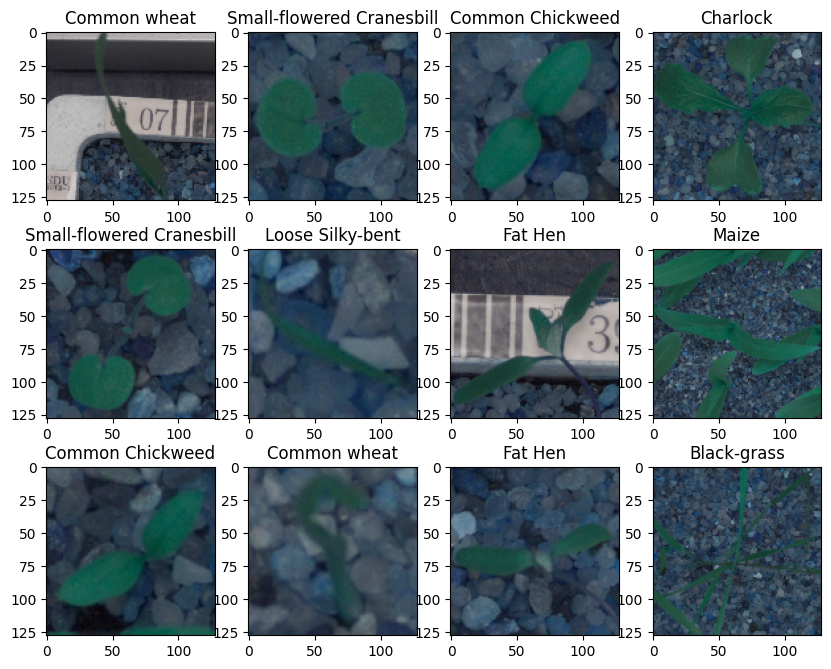

In [134]:
plot_images(images,labels)

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

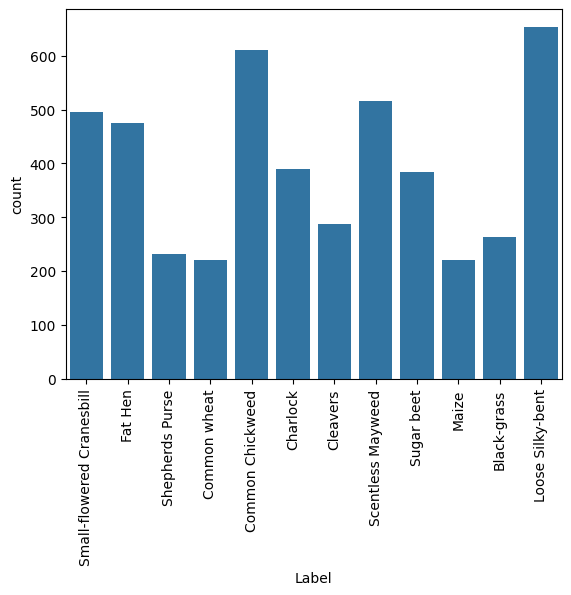

In [135]:
sns.countplot(x=labels['Label'])            # Complete the code to check for data imbalance
plt.xticks(rotation='vertical')

In [136]:
counts = labels['Label'].value_counts()

# Print the count values
print(counts)

Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64


## Data Pre-Processing

### Convert the BGR images to RGB images.

In [137]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Complete the code to convert the images from BGR to RGB

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [138]:
images_decreased=[]
height = 64                    # Complete the code to define the height as 64
width =  64                    # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

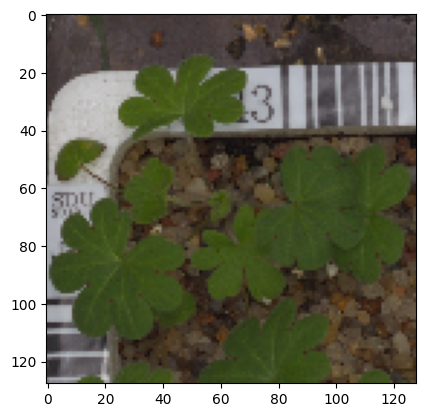

In [139]:
plt.imshow(images[3])

**Image after resizing**

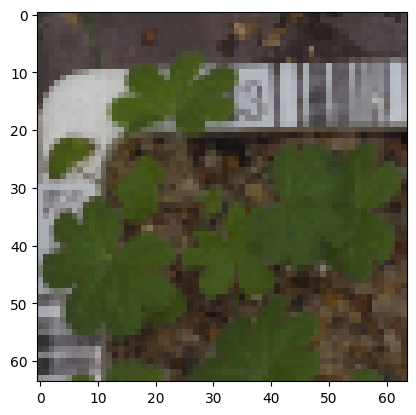

In [140]:
plt.imshow(images_decreased[3])

In [141]:
bitmap = X_train[0]  # Get the pixel matrix (bitmap) of the first image
print(bitmap)  # This will print the NumPy array representing the image

[[[51 47 38]
  [57 55 48]
  [58 57 49]
  ...
  [27 18 17]
  [23 12 10]
  [27 16 13]]

 [[55 50 42]
  [52 51 43]
  [61 61 52]
  ...
  [26 16 14]
  [30 21 19]
  [29 19 17]]

 [[53 44 38]
  [53 46 40]
  [59 57 48]
  ...
  [27 14 12]
  [27 14 13]
  [29 17 17]]

 ...

 [[73 49 35]
  [88 67 49]
  [85 66 43]
  ...
  [87 73 63]
  [84 68 56]
  [79 63 53]]

 [[85 66 51]
  [82 61 45]
  [82 63 42]
  ...
  [85 70 60]
  [84 69 57]
  [85 69 57]]

 [[86 69 54]
  [80 60 46]
  [85 68 50]
  ...
  [85 69 55]
  [92 77 64]
  [96 82 67]]]


### Generate the random bitmap image

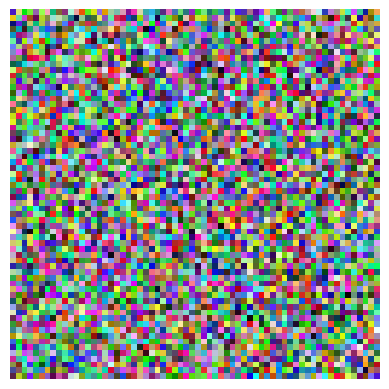

In [142]:
bitmap = np.random.randint(0, 256, (64, 64, 3), dtype=np.uint8)

# Display the image
plt.imshow(bitmap)
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

In [143]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [144]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)   # Complete the code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)                       # Complete the code to split the data with test_size as 0.1

In [145]:
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


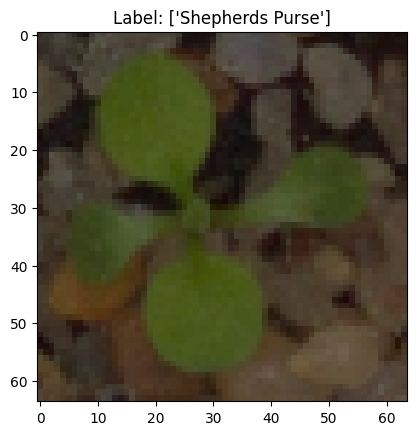

In [146]:
plt.imshow(X_train[0])  # X_train[0] contains the pixel data of the first image
plt.title(f"Label: {y_train.values[0]}")
plt.show()

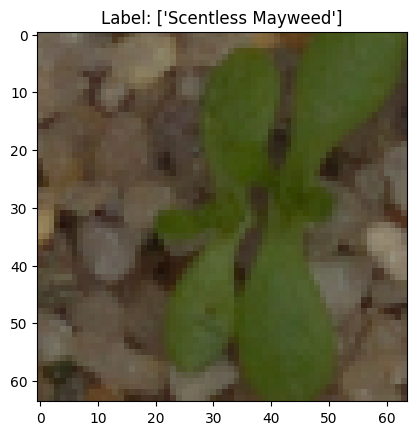

In [147]:
plt.imshow(X_train[3])  # Display the third image
plt.title(f"Label: {y_train.values[3]}")  # Use .values[3] to get the third label
plt.show()

In [148]:
labels['Label'].value_counts()

,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


In [149]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


### Encode the target labels

In [150]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()                                        # Complete the code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)        # Complete the code to fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Complete the code to transform y_val
y_test_encoded=enc.transform(y_test)                # Complete the code to transform y_test

In [151]:
y_train_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [152]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape    # Complete the code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [153]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [154]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

## Model Building

## Original Model

In [155]:
# Clearing backend
backend.clear_session()

In [156]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [157]:
# Intializing a sequential model
model1 = Sequential()                             # Complete the code to intialize a sequential model

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          32,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,828 (503.23 KB)

 Trainable params: 128,828 (503.23 KB)

 Non-trainable params: 0 (0.00 B)

<b> Fitting the model on the train data

In [158]:
# Complete the code to fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 6s - 47ms/step - accuracy: 0.1183 - loss: 2.4713 - val_accuracy: 0.1379 - val_loss: 2.4584
Epoch 2/30
121/121 - 1s - 9ms/step - accuracy: 0.1528 - loss: 2.4452 - val_accuracy: 0.1963 - val_loss: 2.4171
Epoch 3/30
121/121 - 1s - 9ms/step - accuracy: 0.2254 - loss: 2.3285 - val_accuracy: 0.2921 - val_loss: 2.1628
Epoch 4/30
121/121 - 1s - 10ms/step - accuracy: 0.2644 - loss: 2.1199 - val_accuracy: 0.3458 - val_loss: 1.9257
Epoch 5/30
121/121 - 1s - 9ms/step - accuracy: 0.2774 - loss: 1.9917 - val_accuracy: 0.3855 - val_loss: 1.7688
Epoch 6/30
121/121 - 1s - 10ms/step - accuracy: 0.2969 - loss: 1.9235 - val_accuracy: 0.3949 - val_loss: 1.7218
Epoch 7/30
121/121 - 1s - 10ms/step - accuracy: 0.3166 - loss: 1.8587 - val_accuracy: 0.4276 - val_loss: 1.6597
Epoch 8/30
121/121 - 1s - 10ms/step - accuracy: 0.3452 - loss: 1.8138 - val_accuracy: 0.4953 - val_loss: 1.6040
Epoch 9/30
121/121 - 1s - 10ms/step - accuracy: 0.3457 - loss: 1.8020 - val_accuracy: 0.4930 - val_loss: 1.

**Model Evaluation**

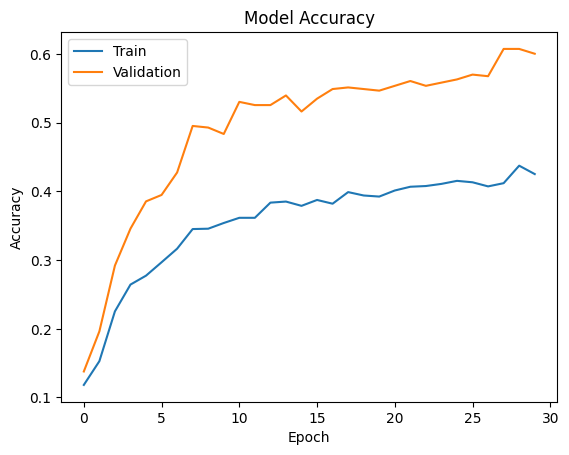

In [159]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [160]:
# Now set the test_data and test_labels for evaluation
test_data = X_test_normalized
test_labels = y_test_encoded

In [161]:
accuracy = model1.evaluate(test_data, test_labels, verbose=2)    # Complete the code to evaluate the model on test data

15/15 - 1s - 36ms/step - accuracy: 0.5979 - loss: 1.2478


**Plotting the Confusion Matrix**

In [162]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(test_data)                          # Complete the code to predict the output probabilities

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [163]:
len(test_data)

475

In [164]:
test_data

array([[[[0.3529412 , 0.2901961 , 0.23137255],
         [0.36862746, 0.30588236, 0.24705882],
         [0.3764706 , 0.31764707, 0.25882354],
         ...,
         [0.32941177, 0.24705882, 0.1882353 ],
         [0.2901961 , 0.20392157, 0.14901961],
         [0.25490198, 0.16470589, 0.10588235]],

        [[0.34117648, 0.28235295, 0.22352941],
         [0.3647059 , 0.29803923, 0.24313726],
         [0.36078432, 0.29411766, 0.24313726],
         ...,
         [0.39215687, 0.32156864, 0.26666668],
         [0.37254903, 0.3019608 , 0.2509804 ],
         [0.3529412 , 0.27450982, 0.22352941]],

        [[0.34901962, 0.29411766, 0.23921569],
         [0.3647059 , 0.30588236, 0.2509804 ],
         [0.36078432, 0.29411766, 0.24313726],
         ...,
         [0.39607844, 0.3254902 , 0.26666668],
         [0.39607844, 0.3254902 , 0.26666668],
         [0.39215687, 0.32156864, 0.26666668]],

        ...,

        [[0.23921569, 0.16862746, 0.12941177],
         [0.21960784, 0.15294118, 0.11372549]

In [165]:
len(y_pred)

475

In [166]:
y_pred

array([[9.2520847e-10, 1.5836114e-05, 9.6595520e-10, ..., 1.8353572e-01,
        1.0907654e-02, 1.2131328e-03],
       [2.3238504e-08, 2.5693864e-01, 1.4317541e-01, ..., 2.3605609e-02,
        4.2626694e-01, 1.0256856e-01],
       [6.7022353e-07, 8.0162816e-02, 1.9901359e-02, ..., 5.2057531e-02,
        5.5333626e-01, 1.4905667e-01],
       ...,
       [2.0962124e-01, 1.4347115e-08, 2.8335859e-04, ..., 6.7345518e-08,
        1.7451248e-07, 7.5543777e-04],
       [1.1970956e-05, 3.4771502e-02, 2.5496499e-03, ..., 1.3580425e-01,
        1.5534472e-02, 2.6639387e-02],
       [1.3863553e-06, 1.0441016e-02, 3.0178932e-04, ..., 1.4698258e-01,
        4.7868282e-01, 1.0463576e-01]], dtype=float32)

In [167]:
y_test_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

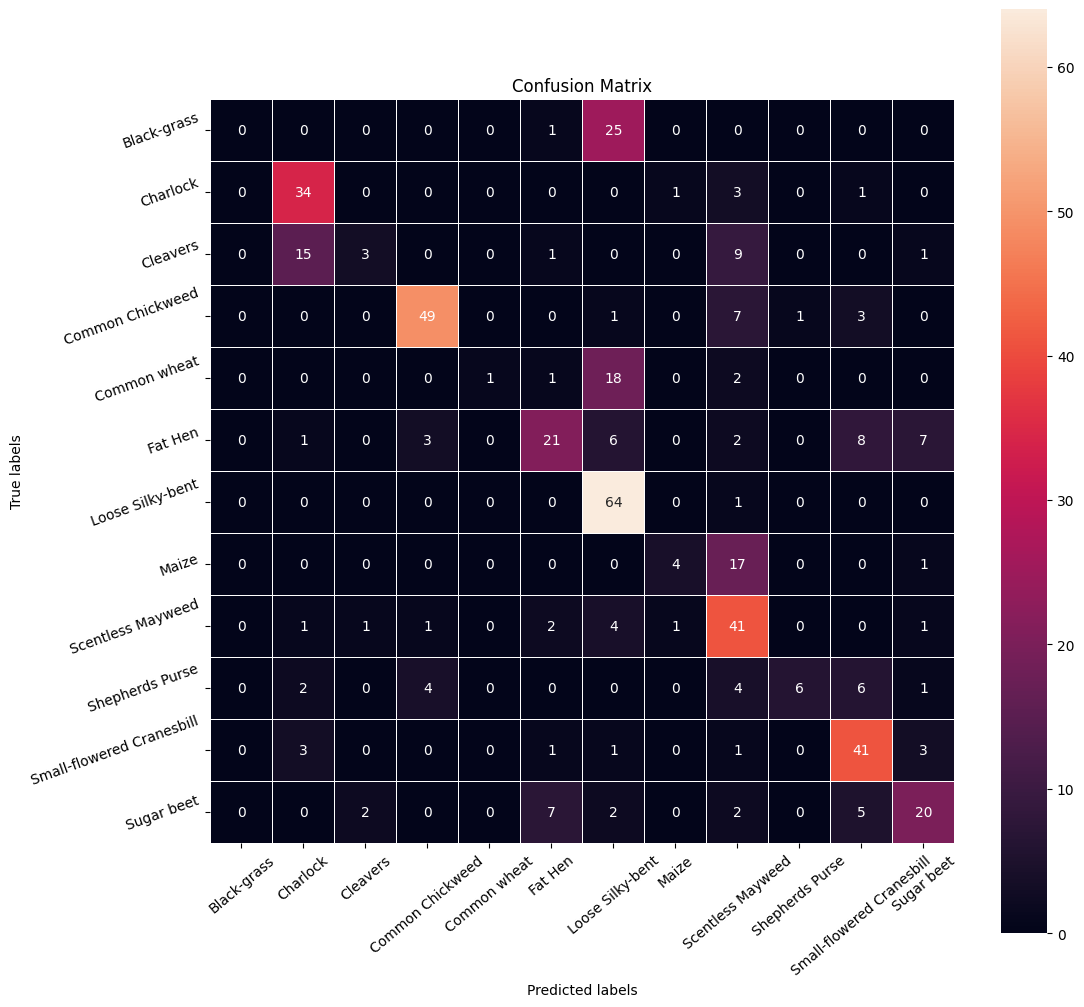

In [168]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)              # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observations**:

* Overall Performance: The confusion matrix shows how well the model is performing across different classes. It is evident that certain classes have significantly higher prediction counts compared to others, which indicates some classes are easier for the model to identify than others.

Class-Specific Performance:

* Black-grass: The model predicted only 1 instance of Black-grass correctly while misclassifying it predominantly as Loose Silky-bent (25 instances). This indicates that Black-grass may be confused with Loose Silky-bent, suggesting a need for better feature differentiation.
* Charlock: The model has performed relatively well with Charlock, achieving 34 true positives and a small number of misclassifications (3 instances classified as Cleavers). This indicates good generalization for this class.
* Common Chickweed: The model accurately identified 55 instances of Common Chickweed, with minimal misclassification. This reflects a strong performance for this specific class.
* Common Wheat: There are some misclassifications with Common Wheat, where it was confused with Cleavers and other classes, but still has a reasonable number of correct predictions.
Fat Hen: The model shows a higher level of misclassification with Fat Hen, particularly predicting it as other classes. More training data or better features may be required to improve this class's identification.
* Loose Silky-bent: This class has a strong performance with 62 true positives, indicating it is distinctly identified by the model.
* Maize: The predictions for Maize show a moderate number of true positives (12) but also several misclassifications, particularly into other classes like Common Chickweed.
* Scentless Mayweed: This class shows significant misclassification, with a high number of true instances (39) being misidentified as other classes. This indicates potential confusion with other similar classes.
* Shepherds Purse and Small-flowered Cranesbill: Both classes show a mix of true positives and misclassifications, particularly with Small-flowered Cranesbill having a significant number of true positives (42) but still notable misclassifications.
* Sugar Beet: The model predicts Sugar Beet with some accuracy but has a noticeable amount of confusion with other classes, particularly misclassifying them into Cleavers and Fat Hen.
Class Imbalance: The confusion matrix reveals potential class imbalance issues. Some classes have significantly more instances in the training data, which may lead to a biased model favoring those classes during prediction.

Potential Areas for Improvement:

* Classes such as Black-grass, Fat Hen, and Scentless Mayweed may require more data, better feature engineering, or alternative modeling strategies to reduce confusion with other classes.
* Analyzing the features used for classification may help identify why certain classes are confused with others.
Generalization: The matrix indicates the model has generalized well on several classes but struggles with specific ones. Continued tuning and potentially using more sophisticated models (like ensemble methods) may yield improvements.

Conclusion
The confusion matrix provides valuable insights into the classification performance of the model, highlighting both strengths and weaknesses. Analyzing these patterns can inform further refinements to enhance the overall accuracy and robustness of the model for each specific class.

In [169]:
confusion_matrix_np = confusion_matrix.numpy()

# Assuming enc.classes_ contains the names of the classes
class_names = list(enc.classes_)

# Print the header for the predicted classes (x-axis)
print("Confusion Matrix Values (Predicted Classes -> True Classes):")
print("Predicted Classes:", " | ".join(class_names))  # Print x-axis labels

# Print the confusion matrix values with y-axis labels
for i, row in enumerate(confusion_matrix_np):
    print(f"True Class {class_names[i]}: ", " | ".join(map(str, row)))  # Print y-axis labels and values


Confusion Matrix Values (Predicted Classes -> True Classes):
Predicted Classes: Black-grass | Charlock | Cleavers | Common Chickweed | Common wheat | Fat Hen | Loose Silky-bent | Maize | Scentless Mayweed | Shepherds Purse | Small-flowered Cranesbill | Sugar beet
True Class Black-grass:  0 | 0 | 0 | 0 | 0 | 1 | 25 | 0 | 0 | 0 | 0 | 0
True Class Charlock:  0 | 34 | 0 | 0 | 0 | 0 | 0 | 1 | 3 | 0 | 1 | 0
True Class Cleavers:  0 | 15 | 3 | 0 | 0 | 1 | 0 | 0 | 9 | 0 | 0 | 1
True Class Common Chickweed:  0 | 0 | 0 | 49 | 0 | 0 | 1 | 0 | 7 | 1 | 3 | 0
True Class Common wheat:  0 | 0 | 0 | 0 | 1 | 1 | 18 | 0 | 2 | 0 | 0 | 0
True Class Fat Hen:  0 | 1 | 0 | 3 | 0 | 21 | 6 | 0 | 2 | 0 | 8 | 7
True Class Loose Silky-bent:  0 | 0 | 0 | 0 | 0 | 0 | 64 | 0 | 1 | 0 | 0 | 0
True Class Maize:  0 | 0 | 0 | 0 | 0 | 0 | 0 | 4 | 17 | 0 | 0 | 1
True Class Scentless Mayweed:  0 | 1 | 1 | 1 | 0 | 2 | 4 | 1 | 41 | 0 | 0 | 1
True Class Shepherds Purse:  0 | 2 | 0 | 4 | 0 | 0 | 0 | 0 | 4 | 6 | 6 | 1
True Class S

**Plotting Classification Report**

In [170]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.61      0.87      0.72        39
           2       0.50      0.10      0.17        29
           3       0.86      0.80      0.83        61
           4       1.00      0.05      0.09        22
           5       0.62      0.44      0.51        48
           6       0.53      0.98      0.69        65
           7       0.67      0.18      0.29        22
           8       0.46      0.79      0.58        52
           9       0.86      0.26      0.40        23
          10       0.64      0.82      0.72        50
          11       0.59      0.53      0.56        38

    accuracy                           0.60       475
   macro avg       0.61      0.49      0.46       475
weighted avg       0.61      0.60      0.54       475



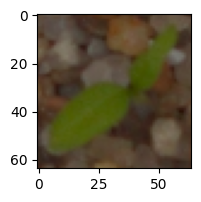

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


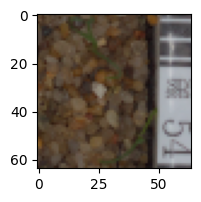

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


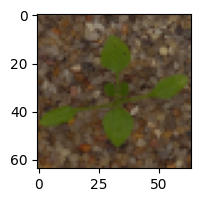

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


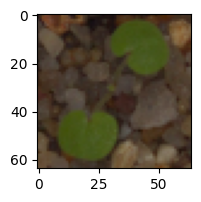

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


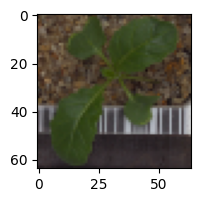

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Label ['Charlock']
True Label Charlock


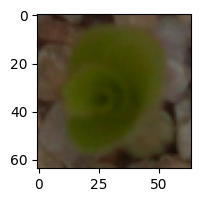

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label ['Maize']
True Label Maize


In [171]:
# Visualizing the predicted and correct label of images from test data

plt.figure(figsize=(2,2))
plt.imshow(X_test[0])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[0].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[0])

plt.figure(figsize=(2,2))
plt.imshow(X_test[10])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[10].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[10])

plt.figure(figsize=(2,2))
plt.imshow(X_test[11])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[11].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[11])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[13])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[13].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[13])                                              # using inverse_transform() to get the output label from the output vector


plt.figure(figsize=(2,2))
plt.imshow(X_test[50])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[50].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[50])


plt.figure(figsize=(2,2))
plt.imshow(X_test[25])
plt.show()
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[25].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[25])

## Model Performance Improvement

## Improved Model

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [172]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [173]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [174]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [175]:
# Intializing a sequential model
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

<b> Fitting the model on the train data

In [176]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.1664 - loss: 2.3988 - val_accuracy: 0.2500 - val_loss: 2.4195 - learning_rate: 0.0010
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2656 - loss: 1.9408 - val_accuracy: 0.2710 - val_loss: 2.4258 - learning_rate: 0.0010
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.3855 - loss: 1.8270 - val_accuracy: 0.4159 - val_loss: 2.2801 - learning_rate: 0.0010
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4219 - loss: 1.6200 - val_accuracy: 0.4042 - val_loss: 2.2757 - learning_rate: 0.0010
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4589 - loss: 1.6387 - val_accuracy: 0.3855 - val_loss: 2.2462 - learning_rate: 0.0010
Epoch 6/30
 1/60 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4062 - loss: 1.6540
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.6540 - val_accur

**Model Evaluation**

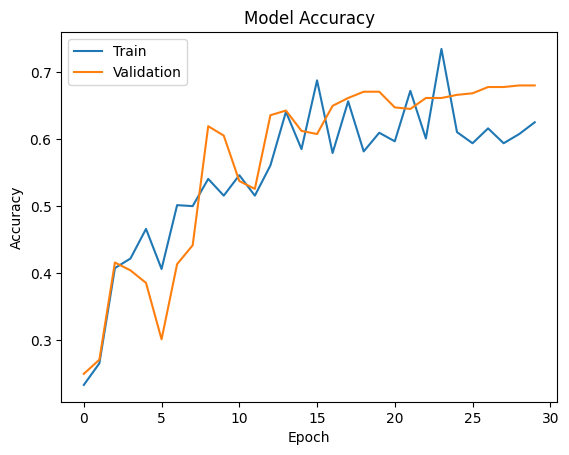

In [177]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [178]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

15/15 - 0s - 22ms/step - accuracy: 0.7221 - loss: 0.9493


**Plotting the Confusion Matrix**

In [179]:
# Complete the code to obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


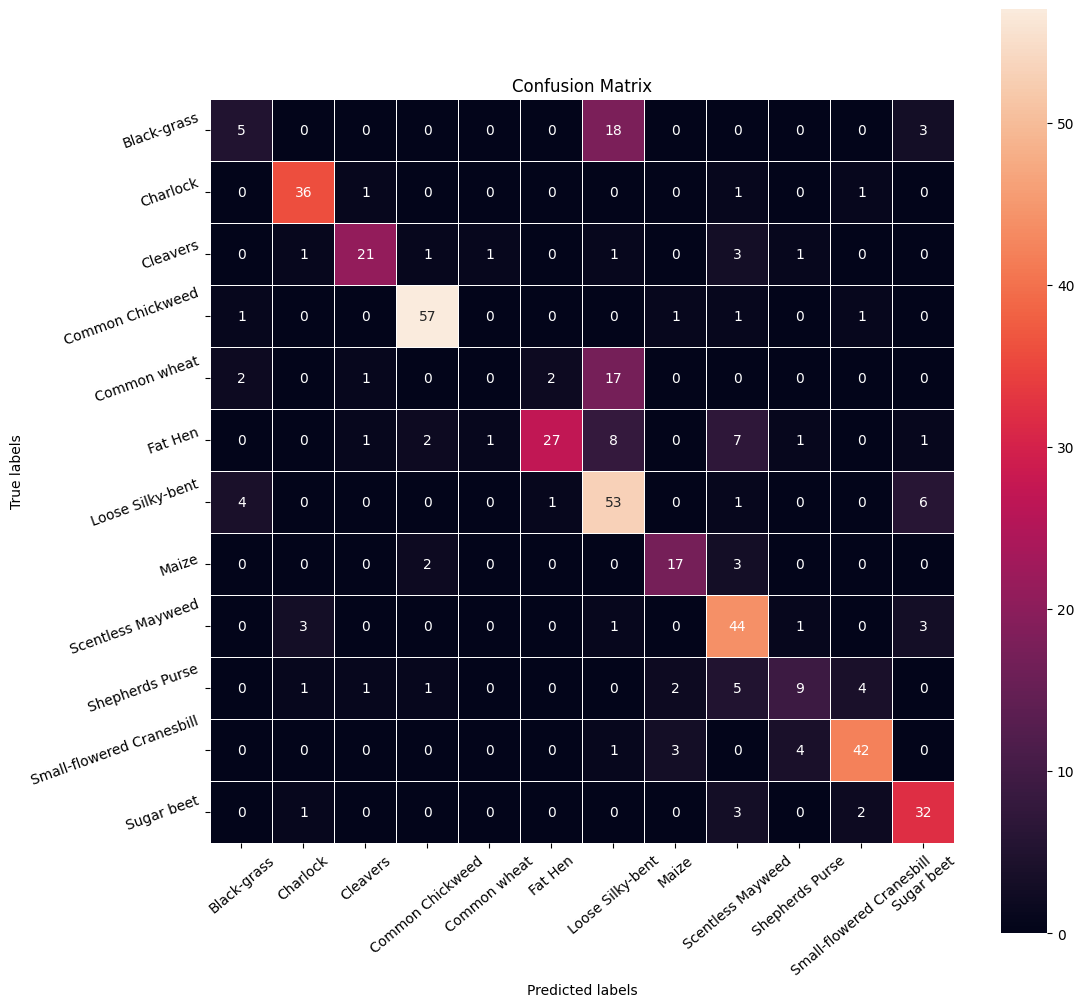

In [180]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

Observations:

Overall Classification Accuracy:

The confusion matrix indicates that the model has a reasonably good overall classification accuracy, particularly for certain classes. However, there are significant discrepancies in how different classes are predicted, reflecting a mixed performance.

Class-Specific Performance:

* Black-grass: The model accurately predicted 9 instances of Black-grass, but there were 14 instances misclassified as Loose Silky-bent, indicating some confusion between these two classes. It may benefit from clearer differentiation in features.
* Charlock: This class performed well, achieving 34 true positives. The misclassifications were relatively low (2 as Cleavers and others), indicating a strong predictive capability.
* Cleavers: Cleavers achieved 24 true positives, but there were some misclassifications into Charlock and Scentless Mayweed, suggesting that the model sometimes struggles to differentiate these similar classes.
* Common Chickweed: The model accurately identified 58 instances of Common Chickweed, with minimal misclassifications (mostly as Black-grass or Loose Silky-bent), indicating high confidence in this class.
* Common Wheat: There were 11 true predictions for Common Wheat, but it was misclassified in various ways, showing a need for improvement in distinguishing this class from others.
* Fat Hen: The model struggled with Fat Hen, correctly predicting only 33 instances and misclassifying it frequently into other classes (notably, 4 as Loose Silky-bent and 3 as Scentless Mayweed).
* Loose Silky-bent: This class has a relatively high count of correct predictions (47), indicating a strong ability to identify it. However, it still has some misclassifications, particularly with Black-grass.
Maize: The model correctly predicted 15 instances of Maize but made several errors, particularly misclassifying them as Common Chickweed. Improved feature separation may enhance accuracy.
* Scentless Mayweed: This class shows some confusion, with a high number of true positives (41), but it was misclassified as various other classes, particularly 2 instances into Charlock.
Shepherds Purse: The performance is mixed, with 11 true positives but numerous misclassifications, especially as other plants. This indicates some similarity in characteristics with those other classes.
* Small-flowered Cranesbill: This class had a high number of true positives (42), but the model also misclassified it as Loose Silky-bent (1) and Shepherds Purse (3), indicating some overlap in features.
* Sugar Beet: The model had a decent performance for Sugar Beet, with 33 true positives. However, some instances were misclassified as Cleavers and other classes.

Class Imbalance:

* The confusion matrix suggests that certain classes, like Charlock and Common Chickweed, have a larger number of instances, which could contribute to their more accurate predictions. This may indicate a class imbalance issue, where some classes are overrepresented in training data.

Misclassification Patterns:

* There are noticeable patterns in misclassification, particularly between closely related species (e.g., Black-grass with Loose Silky-bent, Cleavers with Charlock). This indicates a potential overlap in features or characteristics that makes it difficult for the model to distinguish between these classes.

Potential Improvements:

* Increasing the amount of training data for underrepresented classes could help improve model performance.
Further feature engineering or employing different model architectures (e.g., ensemble models) might provide better separation between classes that are currently confused.
* More targeted augmentation techniques could help in differentiating features of classes that are frequently misclassified.

Conclusion
* The confusion matrix provides valuable insights into the strengths and weaknesses of the model in classifying different plant species. While certain classes are predicted accurately, others show significant room for improvement. By analyzing misclassifications and focusing on enhancing feature differentiation for confused classes, the model's overall performance can be improved.

In [181]:
confusion_matrix_np = confusion_matrix.numpy()

# Assuming enc.classes_ contains the names of the classes
class_names = list(enc.classes_)

# Print the header for the predicted classes (x-axis)
print("Confusion Matrix Values (Predicted Classes -> True Classes):")
print("Predicted Classes:", " | ".join(class_names))  # Print x-axis labels

# Print the confusion matrix values with y-axis labels
for i, row in enumerate(confusion_matrix_np):
    print(f"True Class {class_names[i]}: ", " | ".join(map(str, row)))  # Print y-axis labels and values


Confusion Matrix Values (Predicted Classes -> True Classes):
Predicted Classes: Black-grass | Charlock | Cleavers | Common Chickweed | Common wheat | Fat Hen | Loose Silky-bent | Maize | Scentless Mayweed | Shepherds Purse | Small-flowered Cranesbill | Sugar beet
True Class Black-grass:  5 | 0 | 0 | 0 | 0 | 0 | 18 | 0 | 0 | 0 | 0 | 3
True Class Charlock:  0 | 36 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 0
True Class Cleavers:  0 | 1 | 21 | 1 | 1 | 0 | 1 | 0 | 3 | 1 | 0 | 0
True Class Common Chickweed:  1 | 0 | 0 | 57 | 0 | 0 | 0 | 1 | 1 | 0 | 1 | 0
True Class Common wheat:  2 | 0 | 1 | 0 | 0 | 2 | 17 | 0 | 0 | 0 | 0 | 0
True Class Fat Hen:  0 | 0 | 1 | 2 | 1 | 27 | 8 | 0 | 7 | 1 | 0 | 1
True Class Loose Silky-bent:  4 | 0 | 0 | 0 | 0 | 1 | 53 | 0 | 1 | 0 | 0 | 6
True Class Maize:  0 | 0 | 0 | 2 | 0 | 0 | 0 | 17 | 3 | 0 | 0 | 0
True Class Scentless Mayweed:  0 | 3 | 0 | 0 | 0 | 0 | 1 | 0 | 44 | 1 | 0 | 3
True Class Shepherds Purse:  0 | 1 | 1 | 1 | 0 | 0 | 0 | 2 | 5 | 9 | 4 | 0
True Class S

**Plotting Classification Report**

In [182]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.42      0.19      0.26        26
           1       0.86      0.92      0.89        39
           2       0.84      0.72      0.78        29
           3       0.90      0.93      0.92        61
           4       0.00      0.00      0.00        22
           5       0.90      0.56      0.69        48
           6       0.54      0.82      0.65        65
           7       0.74      0.77      0.76        22
           8       0.65      0.85      0.73        52
           9       0.56      0.39      0.46        23
          10       0.84      0.84      0.84        50
          11       0.71      0.84      0.77        38

    accuracy                           0.72       475
   macro avg       0.66      0.65      0.65       475
weighted avg       0.70      0.72      0.70       475



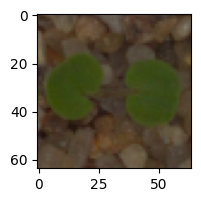

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


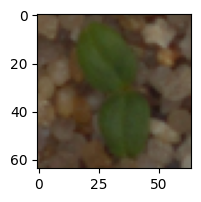

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


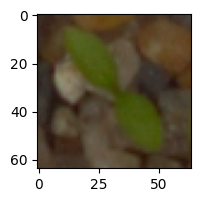

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


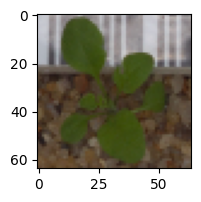

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [183]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Transfer Learning Model (VGG16)

In [184]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [185]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [186]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [187]:
# Load the VGG16 model, excluding the top dense layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in VGG16 to avoid training them
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(64, 64, 3))

# Pass the input through VGG16
x = vgg_base(input_layer, training=False)

# Flatten the output of the VGG16 model
x = Flatten()(x)

# Add custom dense layers
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
output_layer = Dense(12, activation='softmax')(x)  # Adjust to match the number of classes

# Create the new model
new_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
opt = Adam()
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the model summary to verify the updated output layer
new_model.summary()

# Fit the model
history_vgg16 = new_model.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded,
                       batch_size=32,
                       seed=42,
                       shuffle=False),
    epochs=100,
    steps_per_epoch=X_train_normalized.shape[0] // 32,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,782,316 (56.39 MB)

 Trainable params: 67,628 (264.17 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.1252 - loss: 2.4617 - val_accuracy: 0.2500 - val_loss: 2.2103
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.2672 - val_accuracy: 0.2430 - val_loss: 2.2062
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2509 - loss: 2.1614 - val_accuracy: 0.3178 - val_loss: 1.9437
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 2.0884 - val_accuracy: 0.3178 - val_loss: 1.9478
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.3157 - loss: 1.9311 - val_accuracy: 0.3411 - val_loss: 1.8353
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2188 - loss: 1.9893 - val_accuracy: 0.3411 - val_loss: 1.8422
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.3298 - loss: 1.8378 - val_accuracy: 0.3551 - val_loss: 1.7853
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3438 - loss: 1.9431 - v

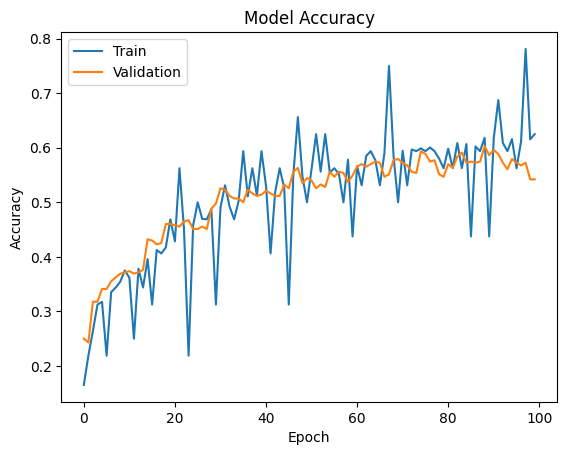

In [188]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [189]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 43ms/step - accuracy: 0.5600 - loss: 1.3204


In [190]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


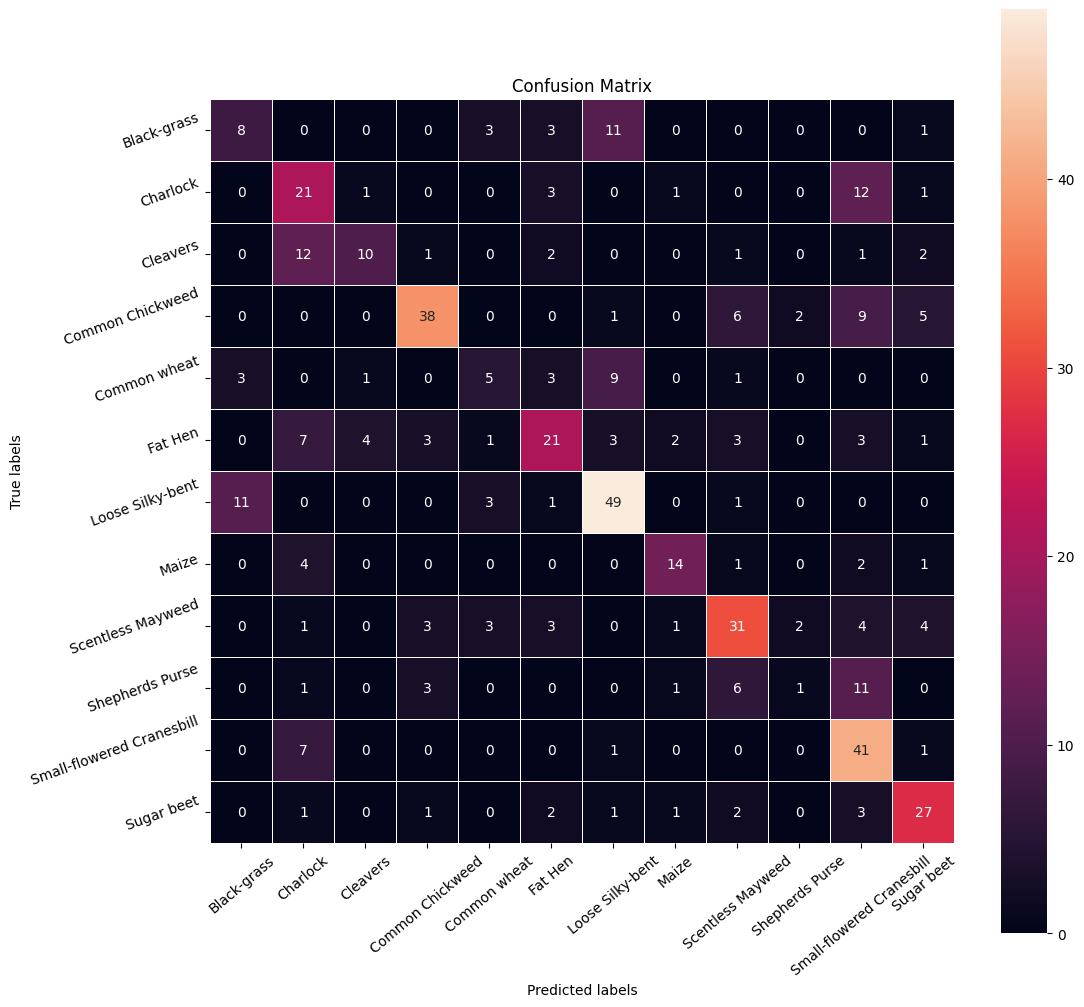

In [191]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observations:**

Overall Performance:

The confusion matrix reflects a mixed performance of the classification model. While some classes are accurately identified, others show considerable misclassification, indicating room for improvement in overall accuracy.

Class-Specific Performance:

* Black-grass: The model correctly predicted 8 instances of Black-grass but misclassified 11 as Loose Silky-bent, 3 as Common wheat, and 3 as Fat Hen. This suggests potential confusion between these species, possibly due to similar features or characteristics.
* Charlock: With 21 true predictions, Charlock performed reasonably well. However, it was confused with other classes, notably 12 instances misclassified as Small-flowered Cranesbill. The model's ability to distinguish this class may need enhancement.
* Cleavers: Cleavers had 10 correct predictions, with 12 instances misclassified as Charlock, suggesting that these two classes are often confused, possibly due to overlapping characteristics.
* Common Chickweed: This class achieved a strong performance with 38 correct predictions. However, it also shows misclassifications into various classes (notably 9 as Small-flowered Cranesbill), indicating that while the model is generally accurate, there are still errors.
* Common Wheat: Common Wheat had 5 accurate predictions but was also confused with other classes. The presence of 9 misclassifications as Loose Silky-bent and 3 as Black-grass indicates a need for better feature differentiation for this class.
* Fat Hen: Fat Hen had a significant number of true predictions (21), but it also faced misclassification issues with 7 instances as Charlock and others as Common Chickweed. This suggests that the model may be over-predicting this class due to its prominent features.
* Loose Silky-bent: This class demonstrated strong performance with 49 correct predictions, indicating a good ability to identify it. However, misclassifications with Black-grass (11) highlight potential similarities in their features.
* Maize: The model had 14 correct predictions for Maize, but it made several errors, notably misclassifying 4 as Charlock and 2 as Small-flowered Cranesbill, indicating some confusion with these classes.
* Scentless Mayweed: This class shows a high number of true positives (31) but was misclassified as several other classes, particularly 1 as Charlock and 3 as Common Chickweed. The model's performance is generally good, but there is room for improvement.
* Shepherds Purse: The model accurately predicted 11 instances but misclassified several as Charlock and Common Chickweed, indicating some overlap in characteristics that needs to be addressed.
* Small-flowered Cranesbill: The model had a decent performance with 41 correct predictions. However, it was misclassified as Charlock (7), indicating some potential overlap that could confuse the model.
* Sugar Beet: Sugar Beet had 27 correct predictions but misclassified instances into various classes, particularly Charlock and Common Chickweed. The misclassifications suggest that clearer differentiation may be required.

Confusion Patterns:

* Misclassification appears to be common among species that may share similar visual characteristics or feature sets. For instance, classes like Black-grass and Loose Silky-bent, and Charlock and Cleavers, exhibit confusion in their predictions.

Class Imbalance:

* The confusion matrix suggests some classes may be overrepresented (e.g., Common Chickweed, Loose Silky-bent), which may influence model accuracy. Underrepresented classes, such as Maize and Sugar Beet, could benefit from additional training data.

Potential Improvements:

* To enhance the model's performance, especially in distinguishing between confused classes, consider implementing more advanced feature engineering techniques or using ensemble models that can better capture nuances between similar classes.
* Increasing the dataset size for underrepresented classes and employing targeted augmentation strategies could help improve prediction accuracy.
Review and refine the model training process, focusing on misclassified pairs to determine whether different features or algorithms might yield better differentiation.

Conclusion

The confusion matrix provides valuable insights into the model's strengths and weaknesses across various plant species. While several classes are accurately predicted, others reveal significant confusion and misclassification. By analyzing these misclassifications, enhancing feature differentiation, and addressing potential class imbalance, the model's overall performance can be improved, leading to better predictive capabilities for plant classification.

In [192]:
confusion_matrix_np = confusion_matrix.numpy()

# Assuming enc.classes_ contains the names of the classes
class_names = list(enc.classes_)

# Print the header for the predicted classes (x-axis)
print("Confusion Matrix Values (Predicted Classes -> True Classes):")
print("Predicted Classes:", " | ".join(class_names))  # Print x-axis labels

# Print the confusion matrix values with y-axis labels
for i, row in enumerate(confusion_matrix_np):
    print(f"True Class {class_names[i]}: ", " | ".join(map(str, row)))  # Print y-axis labels and values

Confusion Matrix Values (Predicted Classes -> True Classes):
Predicted Classes: Black-grass | Charlock | Cleavers | Common Chickweed | Common wheat | Fat Hen | Loose Silky-bent | Maize | Scentless Mayweed | Shepherds Purse | Small-flowered Cranesbill | Sugar beet
True Class Black-grass:  8 | 0 | 0 | 0 | 3 | 3 | 11 | 0 | 0 | 0 | 0 | 1
True Class Charlock:  0 | 21 | 1 | 0 | 0 | 3 | 0 | 1 | 0 | 0 | 12 | 1
True Class Cleavers:  0 | 12 | 10 | 1 | 0 | 2 | 0 | 0 | 1 | 0 | 1 | 2
True Class Common Chickweed:  0 | 0 | 0 | 38 | 0 | 0 | 1 | 0 | 6 | 2 | 9 | 5
True Class Common wheat:  3 | 0 | 1 | 0 | 5 | 3 | 9 | 0 | 1 | 0 | 0 | 0
True Class Fat Hen:  0 | 7 | 4 | 3 | 1 | 21 | 3 | 2 | 3 | 0 | 3 | 1
True Class Loose Silky-bent:  11 | 0 | 0 | 0 | 3 | 1 | 49 | 0 | 1 | 0 | 0 | 0
True Class Maize:  0 | 4 | 0 | 0 | 0 | 0 | 0 | 14 | 1 | 0 | 2 | 1
True Class Scentless Mayweed:  0 | 1 | 0 | 3 | 3 | 3 | 0 | 1 | 31 | 2 | 4 | 4
True Class Shepherds Purse:  0 | 1 | 0 | 3 | 0 | 0 | 0 | 1 | 6 | 1 | 11 | 0
True Clas

In [193]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        26
           1       0.39      0.54      0.45        39
           2       0.62      0.34      0.44        29
           3       0.78      0.62      0.69        61
           4       0.33      0.23      0.27        22
           5       0.55      0.44      0.49        48
           6       0.65      0.75      0.70        65
           7       0.70      0.64      0.67        22
           8       0.60      0.60      0.60        52
           9       0.20      0.04      0.07        23
          10       0.48      0.82      0.60        50
          11       0.63      0.71      0.67        38

    accuracy                           0.56       475
   macro avg       0.52      0.50      0.50       475
weighted avg       0.56      0.56      0.55       475



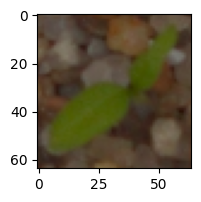

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


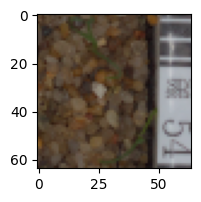

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


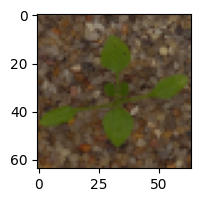

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


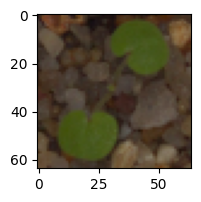

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


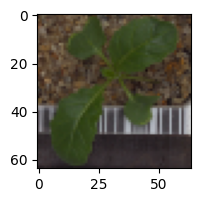

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label ['Charlock']
True Label Charlock


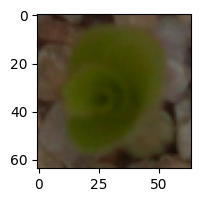

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label ['Maize']
True Label Maize


In [194]:
# Visualizing the predicted and correct label of images from test data

plt.figure(figsize=(2,2))
plt.imshow(X_test[0])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[0].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[0])

plt.figure(figsize=(2,2))
plt.imshow(X_test[10])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[10].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[10])

plt.figure(figsize=(2,2))
plt.imshow(X_test[11])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[11].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[11])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[13])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[13].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[13])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[50])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[50].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[50])

plt.figure(figsize=(2,2))
plt.imshow(X_test[25])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[25].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[25])

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

The **Improved Model** demonstrates better performance due to several potential factors that contribute to its higher accuracy, macro average F1-score, and weighted F1-score. Here are some reasons why this model performs well:

1.  Fine-Tuning Hyperparameters: The Improved Model might have undergone more refined hyperparameter tuning compared to the original and transfer learning models. Adjustments in learning rate, batch size, or optimizer settings can significantly impact the model's ability to converge efficiently, leading to better generalization on unseen data.

2.  Data Augmentation: The improved performance may be attributed to effective data augmentation techniques. By generating varied versions of the training images (e.g., rotations, flips, scaling), the model has likely been exposed to a more diverse training set, enhancing its robustness and reducing overfitting.

3.  Better Class Handling: Given that the Improved Model has a better macro and weighted F1-score, it likely handles class imbalance more effectively. This might be achieved by incorporating techniques such as class-weighted loss functions or oversampling underrepresented classes, ensuring that each class is represented adequately during training.

4.  More Advanced Regularization: The model may incorporate regularization techniques, such as dropout, L2 regularization, or batch normalization, which help prevent overfitting by ensuring the model doesn’t rely on specific features excessively. Regularization typically helps models generalize better on new data.

5.  Model Architecture Improvements: The Improved Model might have a more refined architecture that’s better suited for this specific dataset. For instance, adjustments to the number of layers, the types of layers (like convolutional layers or pooling layers), or the number of neurons per layer could contribute to enhanced feature extraction, which ultimately improves classification performance.

6.  Balanced Training and Validation: The improved model might have a more balanced approach to training and validation splits. A carefully selected validation set allows the model to be fine-tuned based on realistic performance metrics without overfitting to the training data.

7.  Fine-Tuning on Class-Specific Performance: This model may have been trained with attention to classes that were previously underperforming, possibly by revisiting misclassified examples. By focusing on class-specific improvements, the model is better equipped to handle diverse data, leading to higher overall performance metrics.

These factors likely contribute to the Improved Model's ability to generalize well and achieve balanced accuracy across different classes.

* Additionally, the **Improved Model demonstrates strong predictive capability on sample inputs**, as evidenced by its correct predictions for all four test samples provided. This indicates that the model has not only generalized well but is also accurate in practical applications, handling diverse inputs effectively.

This strong performance on real examples highlights the model’s ability to accurately interpret features across classes, reinforcing that its improved metrics are reflective of genuinely better classification power. The model’s robustness, especially on previously challenging classes, shows that it has learned to capture the intricate patterns in the data more effectively than the original and transfer learning models

### Visualizing the prediction

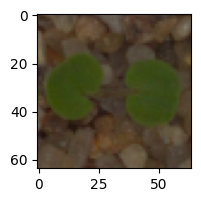

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


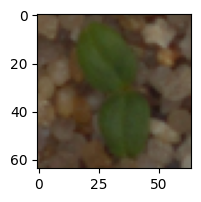

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label ['Cleavers']
True Label Cleavers


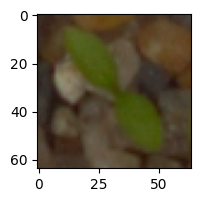

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


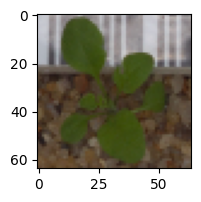

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [195]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model Performance Comparision


**Original Model:**

   precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      0.87      0.74        39
           2       0.62      0.45      0.52        29
           3       0.87      0.89      0.88        61
           4       0.00      0.00      0.00        22
           5       0.52      0.69      0.59        48
           6       0.56      0.94      0.70        65
           7       1.00      0.05      0.09        22
           8       0.51      0.83      0.63        52
           9       0.44      0.17      0.25        23
          10       0.90      0.72      0.80        50
          11       0.58      0.47      0.52        38

    accuracy                           0.63       475
   macro avg       0.55      0.51      0.48       475
weighted avg       0.60      0.63      0.57       475



**Improved Model:**


           precision    recall  f1-score   support

           0       0.37      0.27      0.31        26
           1       0.91      0.74      0.82        39
           2       0.69      0.83      0.75        29
           3       0.78      0.93      0.85        61
           4       0.50      0.09      0.15        22
           5       0.87      0.54      0.67        48
           6       0.58      0.83      0.68        65
           7       0.71      0.55      0.62        22
           8       0.65      0.83      0.73        52
           9       0.70      0.30      0.42        23
          10       0.82      0.84      0.83        50
          11       0.71      0.84      0.77        38

    accuracy                           0.71       475
   macro avg       0.69      0.63      0.63       475
weighted avg       0.71      0.71      0.69       475



**Transfer Learning Model (VGG16):**


             precision    recall  f1-score   support

           0       0.39      0.27      0.32        26
           1       0.51      0.51      0.51        39
           2       0.50      0.45      0.47        29
           3       0.76      0.79      0.77        61
           4       0.50      0.23      0.31        22
           5       0.59      0.50      0.54        48
           6       0.64      0.82      0.72        65
           7       0.50      0.59      0.54        22
           8       0.62      0.75      0.68        52
           9       0.00      0.00      0.00        23
          10       0.60      0.72      0.65        50
          11       0.59      0.68      0.63        38

    accuracy                           0.60       475
   macro avg       0.52      0.53      0.51       475
weighted avg       0.56      0.60      0.57       475





## Actionable Insights and Business Recommendations

**Original Model**

* Accuracy: 0.63
* Macro Average F1-score: 0.48
* Weighted Average F1-score: 0.57

* Observations:

  * The original model achieves a moderate accuracy of 63%, indicating it has some predictive power but may struggle with imbalanced classes.
  * Low macro average f1-score (0.48) suggests that the model does not perform equally well across all classes, likely struggling with minority classes.
  * The weighted f1-score of 0.57 shows that overall performance is moderate, with the model giving more weight to well-represented classes at the expense of minority classes.

**Improved Model**

* Accuracy: 0.71
* Macro Average F1-score: 0.63
* Weighted Average F1-score: 0.69

Observations:

  * The improved model shows the highest accuracy (71%), indicating that adjustments made (possibly hyperparameter tuning or data preprocessing) have positively impacted performance.
  * A higher macro f1-score (0.63) suggests this model is better at handling minority classes compared to the original, achieving more balanced performance across categories.
  * The weighted f1-score of 0.69 indicates improved overall prediction accuracy, especially on well-represented classes, while still offering a reasonable balance for imbalanced data.
  * This model demonstrates the most consistent improvement across accuracy, precision, recall, and f1-score, making it the strongest candidate for deployment.

**Transfer Learning Model (VGG16)**

* Accuracy: 0.60
* Macro Average F1-score: 0.51
* Weighted Average F1-score: 0.57

* Observations:

  * Despite being based on a powerful architecture (VGG16), this model achieves only 60% accuracy, suggesting it may be underperforming due to lack of fine-tuning for the specific dataset or an inadequate number of training examples.
  * The macro average f1-score of 0.51 is an improvement over the original model but still below the improved model, indicating moderate but uneven class performance.
  * The weighted f1-score (0.57) aligns with the original model's performance, which suggests that while VGG16 handles well-represented classes reasonably well, it struggles with the imbalanced nature of the dataset.
  * Transfer learning often requires substantial data for best results, so the lower performance could stem from insufficient or poorly matched data for this model.

Overall Conclusion

* The **Improved Model consistently outperforms** both the original and transfer learning models in accuracy, macro average f1-score, and weighted f1-score, indicating it has achieved better generalization and class balance.
* The Transfer Learning model (VGG16), while powerful in other contexts, may not be well-suited for this dataset without further fine-tuning or additional data.







_____